# Prevendo a rotatividade de clientes de uma empresa de Telecom
### Projeto nº4 da Formação Cientista de Dados da Data Science Academy
O objetivo é trabalho é criar um modelo de aprendizagem de máquina que possa prever se um cliente pode ou não cancelar seu plano e qual a probabilidade de isso ocorrer.

Para isto, são fornecidos um dataset de treinamento, para treinamento e *cross-validation* dos modelos, e também um dataset de teste para mensuração final do resultado do modelo.

Será utilizada a a métrica do R^2 para avaliação dos modelos de machine learning criados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Análise Exploratória de Dados

In [4]:
df = pd.read_csv('data/projeto4_telecom_treino.csv')
df

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [5]:
df.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.dropna()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


Como o comando dropna não altera o número de linhas do dataset, pode-se concluir que não há dados faltantes no conjunto de dados.

In [7]:
df.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
df.dtypes[df.dtypes.values=='object']

state                 object
area_code             object
international_plan    object
voice_mail_plan       object
churn                 object
dtype: object

In [9]:
df.dtypes[df.dtypes.values!='object']

Unnamed: 0                         int64
account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

O *dataset* é constituído por 15 variáveis numéricas e 5 variáveis categóricas. Uma das variáveis é o índice, que deve ser desconsiderado na análise por não acrescentar informação sobre o cliente.

In [10]:
df.set_index('Unnamed: 0', inplace=True)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no


In [11]:
numericas = df[df.dtypes[df.dtypes.values!='object'].index]
numericas

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
Unnamed: 0,,,,,,,,,,,,,,,
1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
4,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
5,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3330,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3331,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [12]:
categoricas = df[df.dtypes[df.dtypes.values=='object'].index]
categoricas

,state,area_code,international_plan,voice_mail_plan,churn
Unnamed: 0,,,,,
1,KS,area_code_415,no,yes,no
2,OH,area_code_415,no,yes,no
3,NJ,area_code_415,no,no,no
4,OH,area_code_408,yes,no,no
5,OK,area_code_415,yes,no,no
...,...,...,...,...,...
3329,AZ,area_code_415,no,yes,no
3330,WV,area_code_415,no,no,no
3331,RI,area_code_510,no,no,no


In [13]:
# Verificando quantos valores únicos há em cada coluna do dataset de variáveis categóricas
n_unicos = pd.DataFrame(columns=['N_unicos'])
for col in categoricas.columns:
    n_unicos.loc[col] = len(df[col].unique())

In [14]:
n_unicos

,N_unicos
state,51
area_code,3
international_plan,2
voice_mail_plan,2
churn,2


Verificando agora a distribuição destas variáveis categóricas entre os *labels* 0 e 1 do *churn*. A intenção é constatar graficamente se as mesmas são significativas para a rotatividade de clientes.

In [15]:
n_unicos.index

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [16]:
tabela = df[['area_code', 'churn', 'account_length']]
tabela

,area_code,churn,account_length
Unnamed: 0,,,
1,area_code_415,no,128
2,area_code_415,no,107
3,area_code_415,no,137
4,area_code_408,no,84
5,area_code_415,no,75
...,...,...,...
3329,area_code_415,no,192
3330,area_code_415,no,68
3331,area_code_510,no,28


In [17]:
agregado = tabela.pivot_table(index='area_code', columns='churn', values='account_length', aggfunc='count')
agregado

churn,no,yes
area_code,,
area_code_408,716,122
area_code_415,1419,236
area_code_510,715,125


In [18]:
df['state']

Unnamed: 0
1       KS
2       OH
3       NJ
4       OH
5       OK
        ..
3329    AZ
3330    WV
3331    RI
3332    CT
3333    TN
Name: state, Length: 3333, dtype: object

In [19]:
labels = df['state'].unique()
labels

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [20]:
x = np.arange(len(labels)) # locais dos labels no gráfico
width = 0.35 # largura das barras

In [21]:
agregado['total'] = agregado.yes + agregado.no

In [22]:
agregado['perc_yes'] = agregado.yes/agregado.total
agregado['perc_no'] = agregado.no/agregado.total

In [23]:
agregado

churn,no,yes,total,perc_yes,perc_no
area_code,,,,,
area_code_408,716,122,838,0.145585,0.854415
area_code_415,1419,236,1655,0.142598,0.857402
area_code_510,715,125,840,0.148810,0.851190


In [24]:
'''
fig, ax = plt.subplots(figsize=(20, 10))
#rects1 = ax.bar(x - width/2, agregado['perc_no'], width, label='No')
rects2 = ax.bar(x + width/2, agregado['perc_yes'], width, label='Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Observações')
ax.set_title('Observações de churn por estado')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

'''

"\nfig, ax = plt.subplots(figsize=(20, 10))\n#rects1 = ax.bar(x - width/2, agregado['perc_no'], width, label='No')\nrects2 = ax.bar(x + width/2, agregado['perc_yes'], width, label='Yes')\n\n# Add some text for labels, title and custom x-axis tick labels, etc.\nax.set_ylabel('Observações')\nax.set_title('Observações de churn por estado')\nax.set_xticks(x)\nax.set_xticklabels(labels)\nax.legend()\n\n"

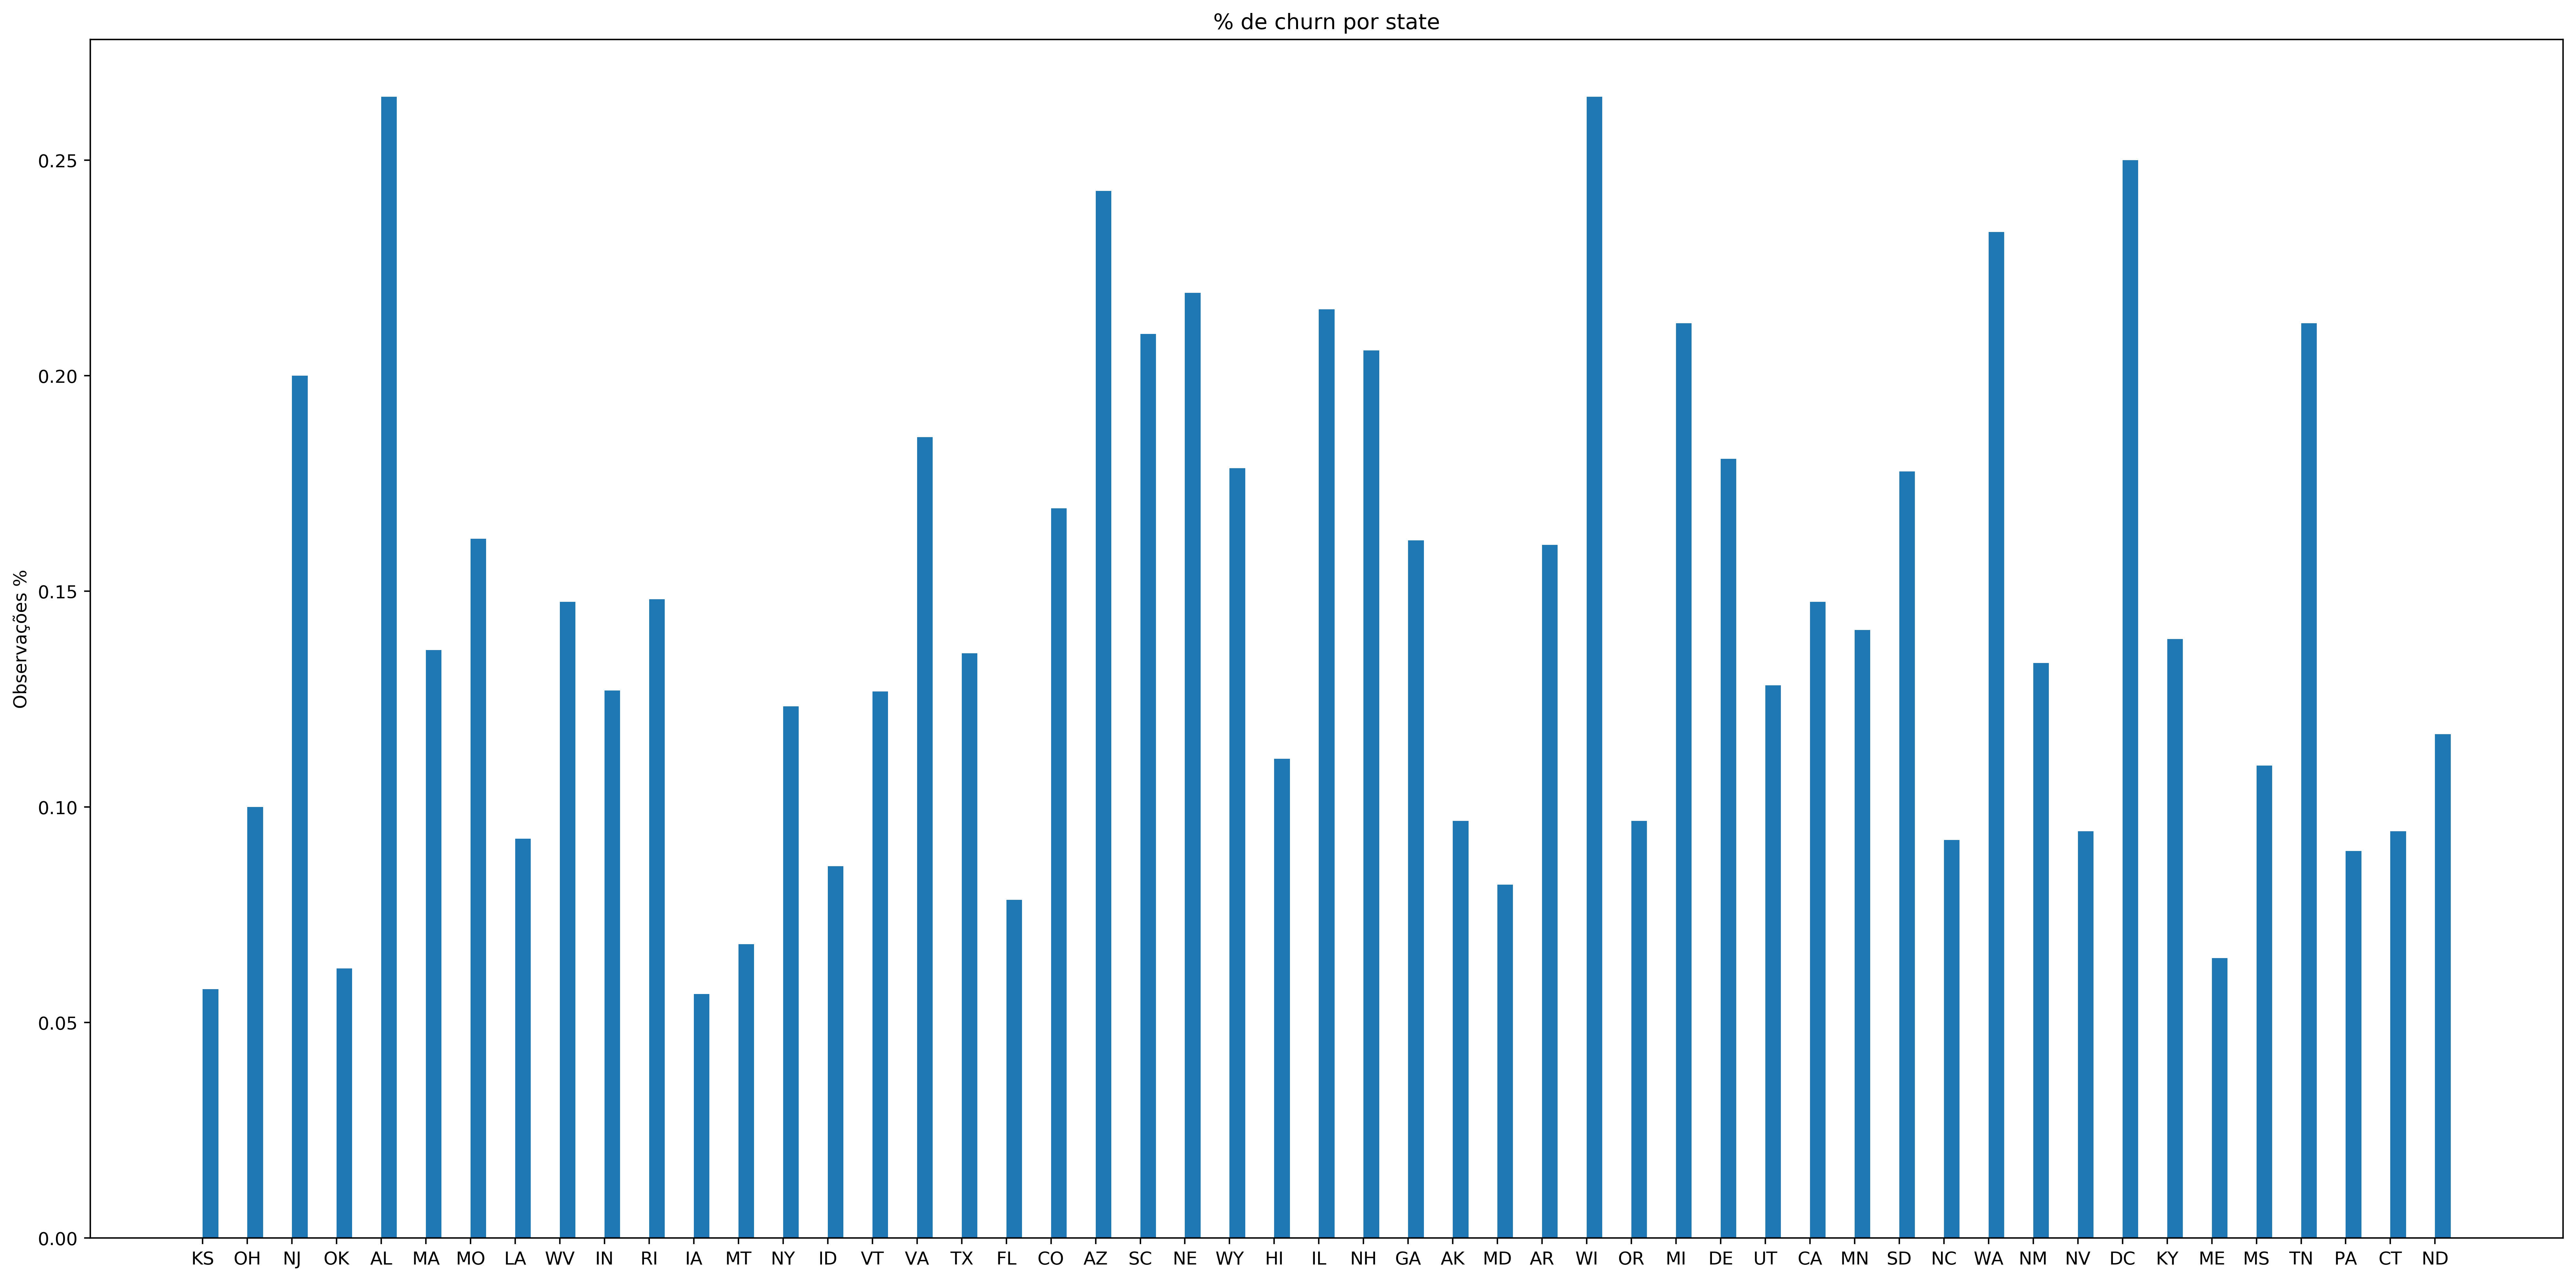

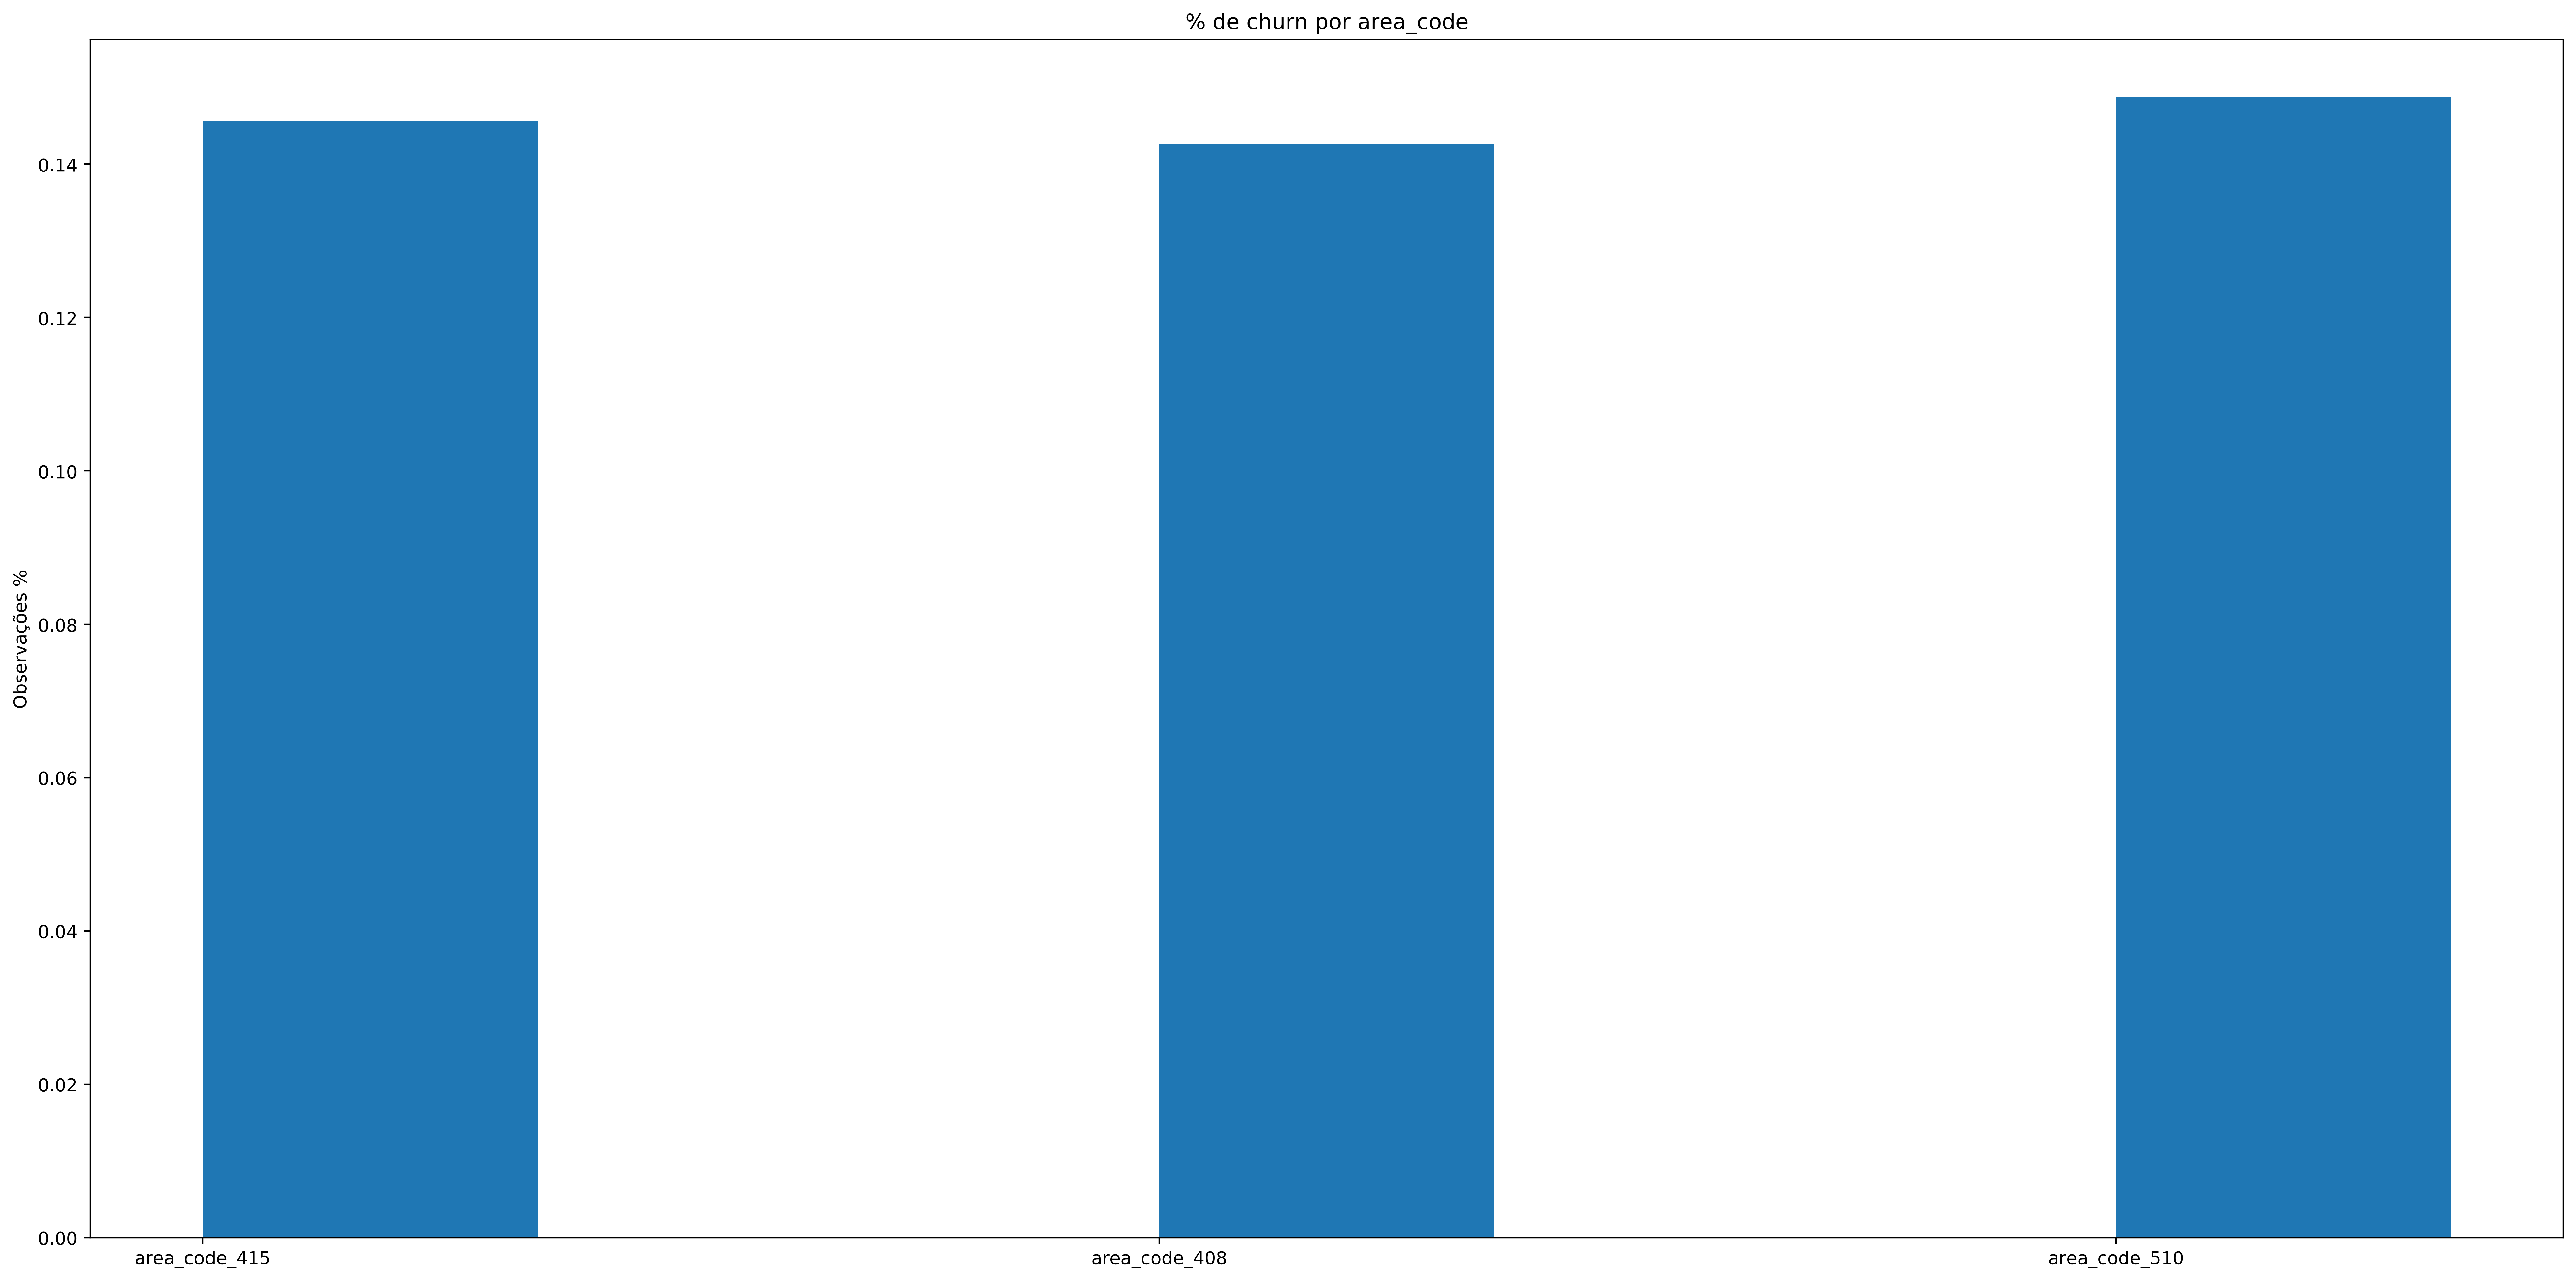

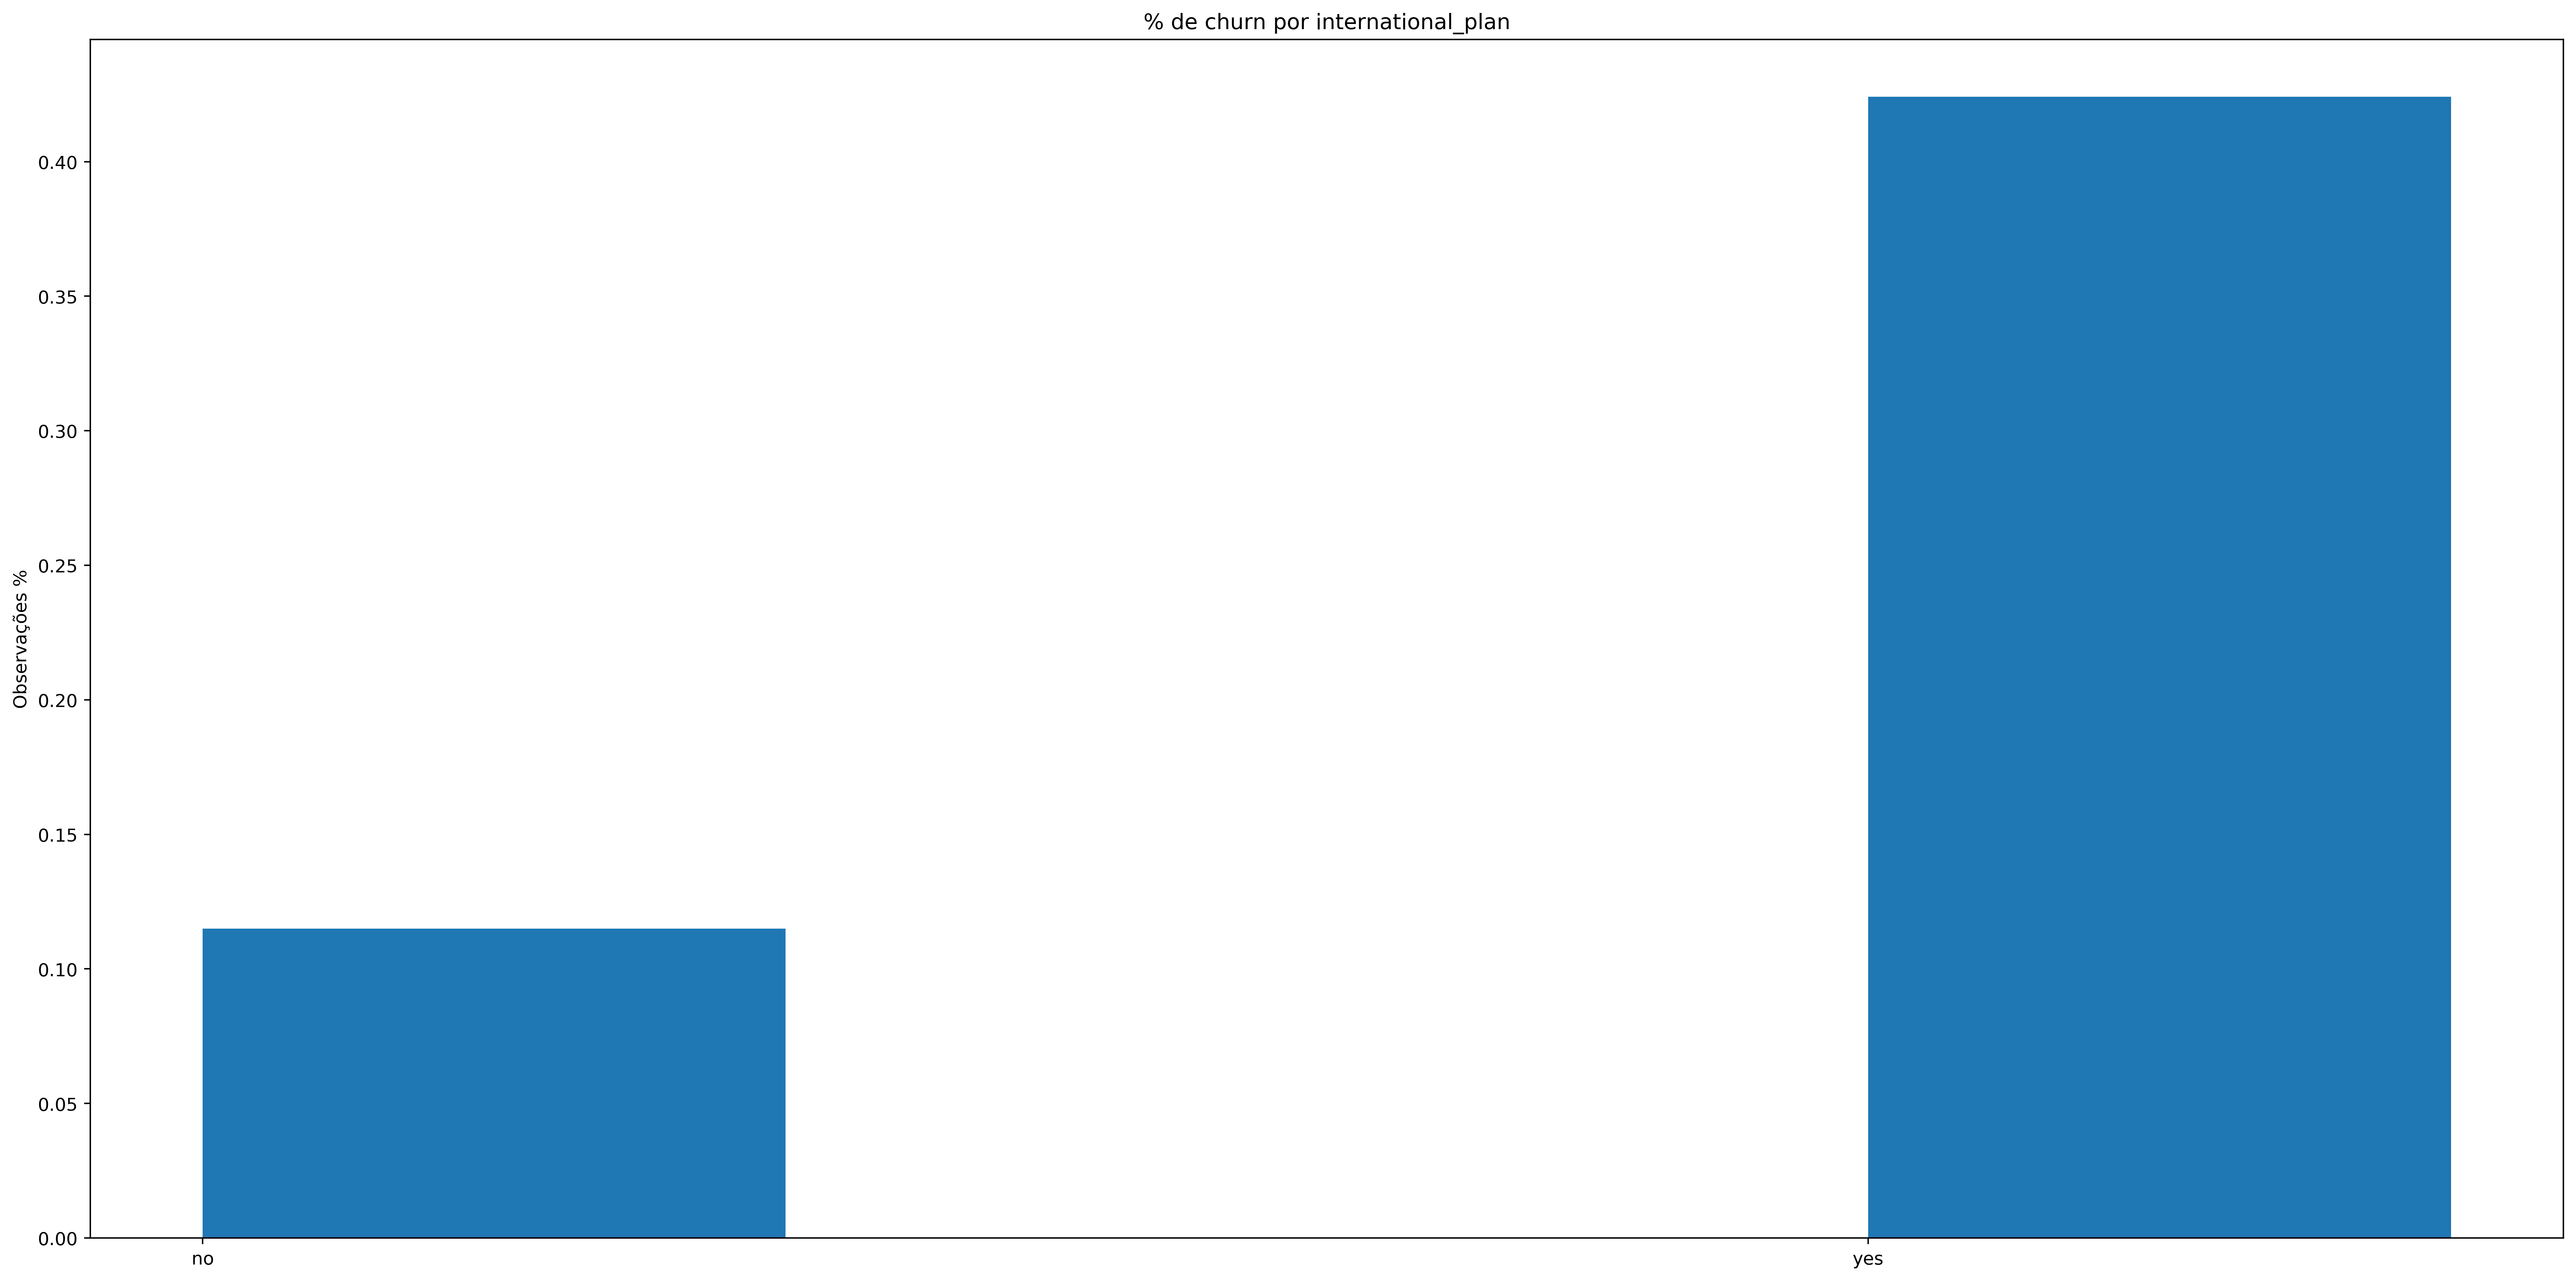

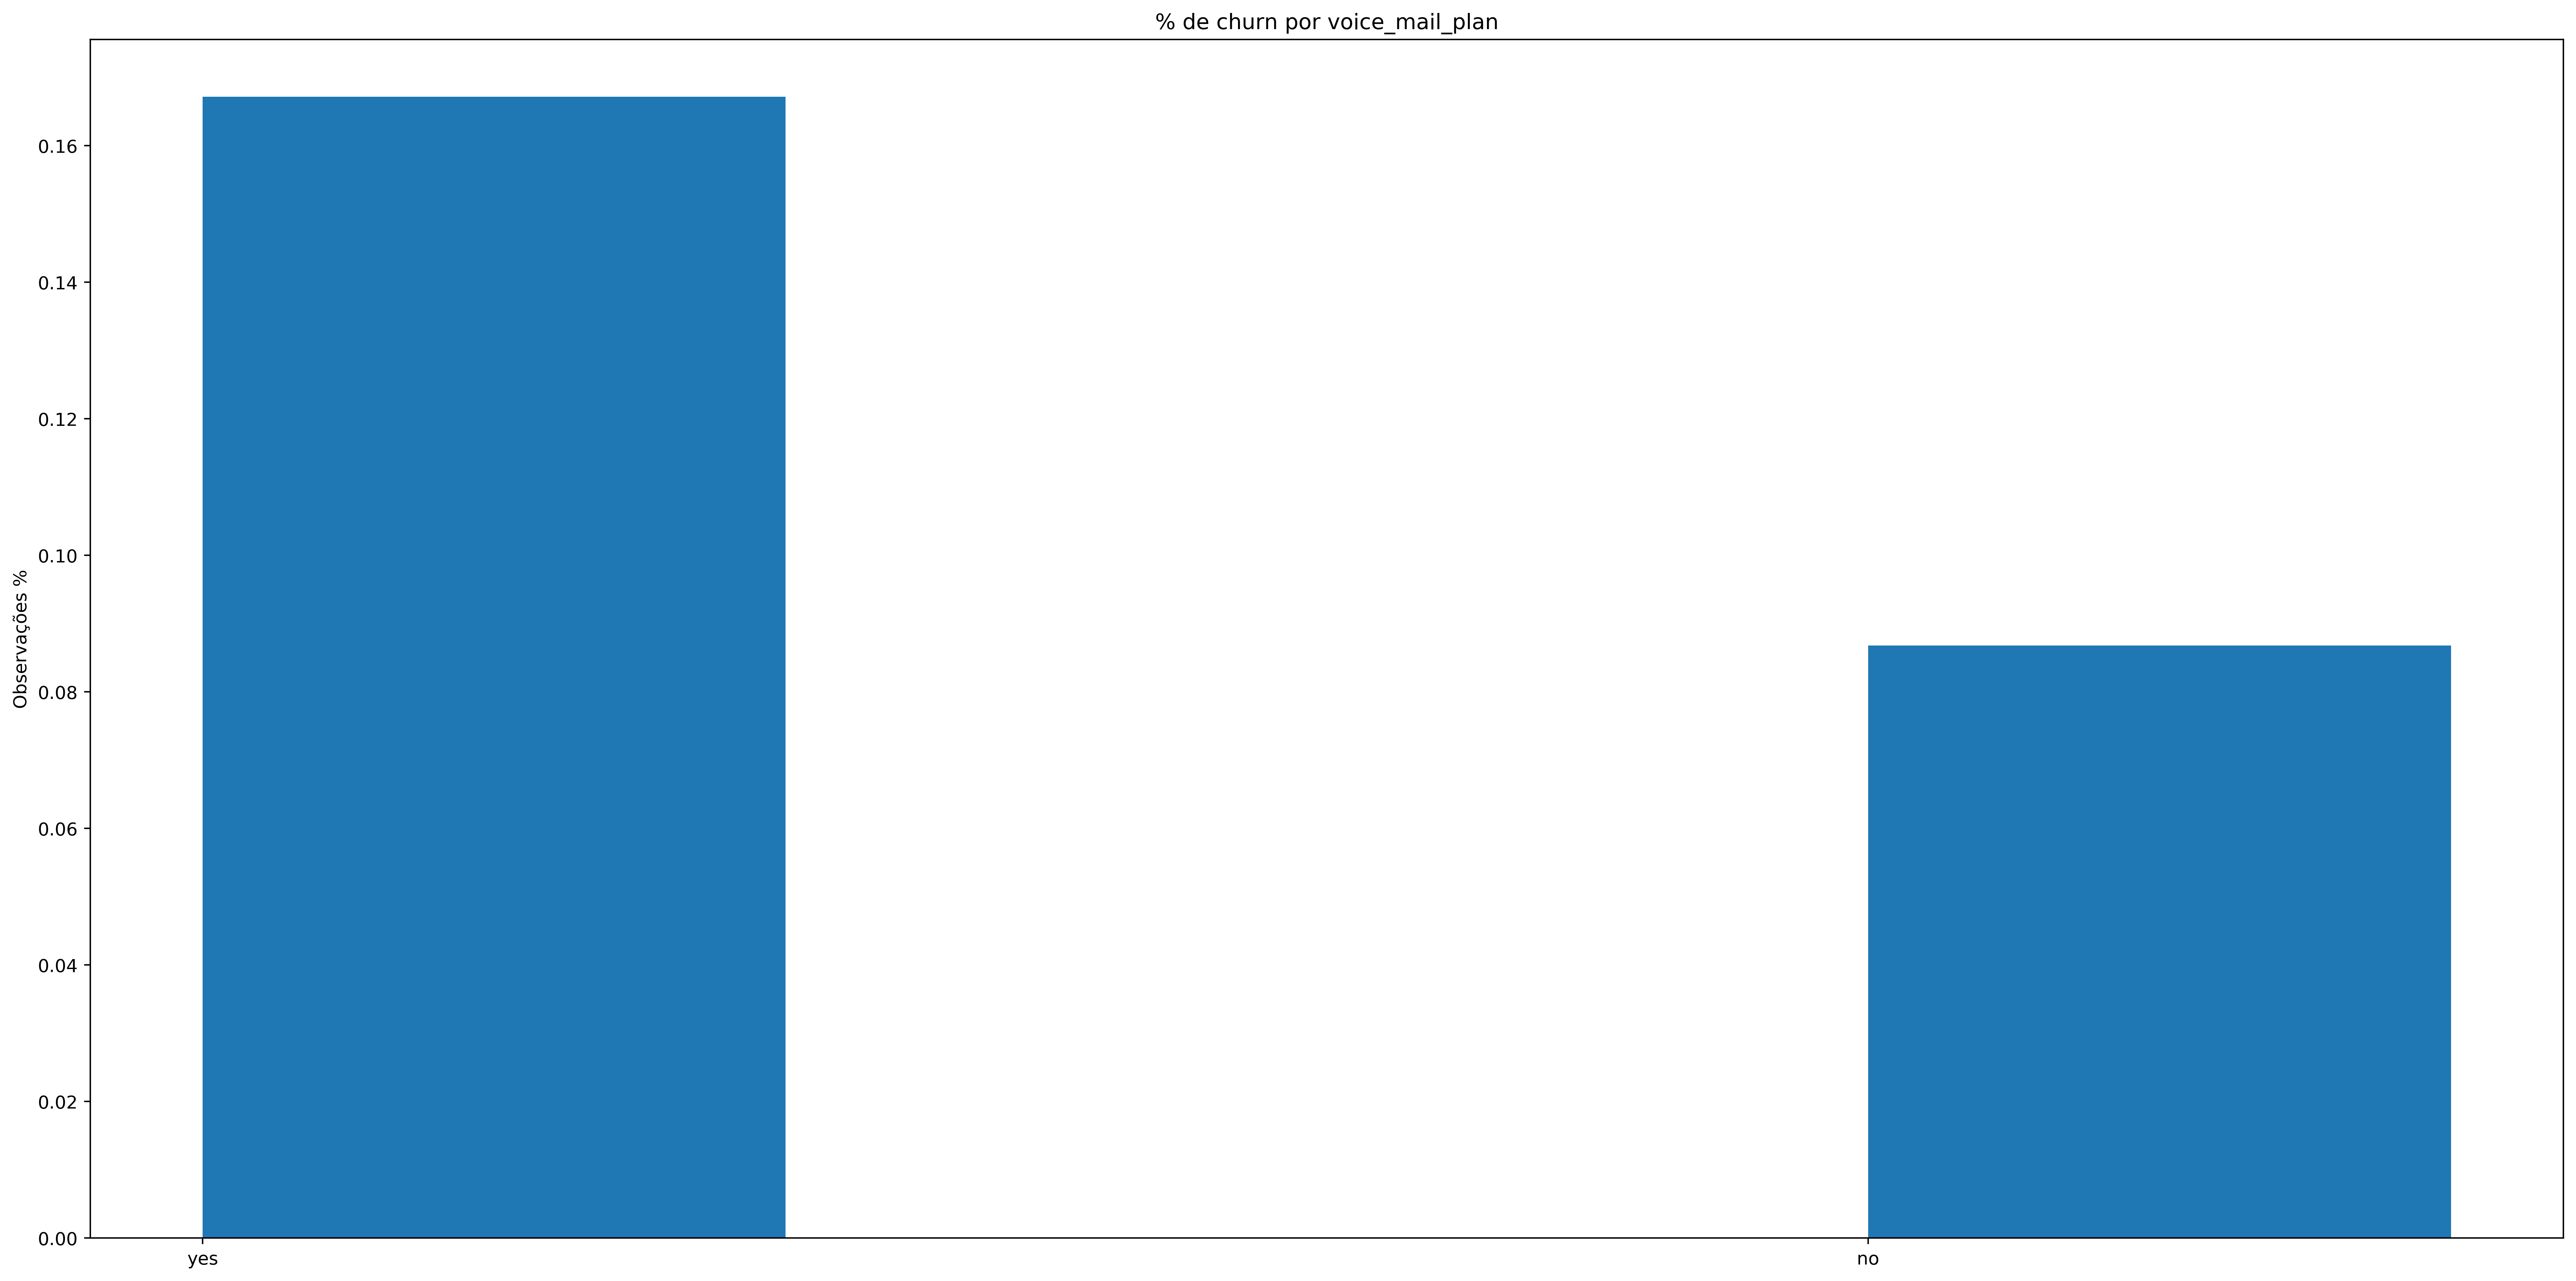

In [35]:
for var in n_unicos.index[:-1]:
    labels = df[var].unique()
    x = np.arange(len(labels)) # locais dos labels no gráfico
    width = 0.35 # largura das barras
    
    tabela = df[[var, 'churn', 'account_length']].set_index(var)
    agregado = tabela.pivot_table(index=var, columns='churn', values='account_length', aggfunc='count')
    agregado['total'] = agregado.yes + agregado.no
    agregado['perc_yes'] = agregado.yes/agregado.total
    agregado['perc_no'] = agregado.no/agregado.total
    
    fig, ax = plt.subplots(figsize=(20, 10), dpi=400)
    #rects1 = ax.bar(x - width/2, agregado['perc_no'], width, label='No')
    rects2 = ax.bar(x + width/2, agregado['perc_yes'], width, label='Yes')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Observações %')
    ax.set_title(f'% de churn por {var}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.legend()
    
    #def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height."""
    #    for rect in rects:
    #        height = rect.get_height()
    #        ax.annotate('{}'.format(height),
    #                    xy=(rect.get_x() + rect.get_width() / 2, height),
    #                    xytext=(0, 3),  # 3 points vertical offset
    #                    textcoords="offset points",
    #                    ha='center', va='bottom')


    #autolabel(rects1)
    #autolabel(rects2)

    fig.tight_layout()

    plt.show()

Próximos passos:
- Imprimir gráficos de boxplot das variáveis contínuas pelas categorias de churn
- Excluir da entrada do modelo as variáveis com menos correlação visual com a variável de saída.
- Implementar modelos de machine learning
- Cross-validation no dataset de treinamento
- Avaliação dos modelos no dataset de teste.

In [32]:
?plt.subplots